## Social Network Analysis of Financial Ties
### Ryan Slipe
### Chintan Thikkar
### DSC-750
### 3/26/2024

For this project, we will be analyzing the financial ties between 20 companies. The companies are real but the ties are made up for the purposes of this assignment. We will be covering network metrics such as:
+ egocentric graphs
+ density of egocentric graphs
+ centrality
+ betweenness centrality
+ closeness centrality
+ prestige

These metrics will tell us more about the network such as who the most important companies are, and if there are any underlying alliances. 

### Components of a Network

Before we get in to the analysis there are some aspects that we should describe that help us understand the underlying componenets of a network. The two main parts of a network are the **actors** and the **edges**. The actors (or nodes) in our example will be the companies. We have 10 companies in this network. One company is Spotify, which is an actor, or node, in our network. Edges are the ties or connections between the actors. These connections can be directed or undirected. In a directed network the connection may not be mutual. These connections are called arcs instead of edges. It may be the case that I am friends with Mike, but Mike is not friends with me. For the sake of this project the connections will be undirected so we will be working with edges. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import networkx as nx

In [3]:
df = pd.read_csv("C:/Users/ryans/Documents/GCU_data_mining/finacial_ties.csv")

In [4]:
df.set_index('Unnamed: 0', inplace = True)

### Initial Descriptive Statistics

We can look at our matrix to see if there is any alliance that may be forming. Based on the connections we see that American Express has many other companies tied to them. We also see that Samsung has many of the same connections that American Express has. Another important player appears to be Cosco. This would make sense intuitively since they sell many products that the other companies create.

In [5]:
df

,Spotify,NBA,HP,Norfolk Southern,Cosco,AAA,Greyhound,Johnson & Johnson,Samsung,American Express
Unnamed: 0,,,,,,,,,,
Spotify,0,1,1,0,0,0,0,0,1,1
NBA,1,0,0,0,0,0,0,0,1,1
HP,0,1,0,0,1,0,0,1,0,0
Norfolk Southern,0,0,0,0,1,1,0,0,0,0
Cosco,0,0,1,1,0,0,0,1,1,1
AAA,0,0,0,0,0,0,1,0,0,0
Greyhound,0,1,0,1,0,1,0,0,0,0
Johnson & Johnson,0,0,0,0,1,0,0,0,0,1
Samsung,1,1,0,1,1,0,0,0,0,1


First, we will get our data frame into the correct format to be transformed into a graph using networkx.

In [6]:
# view columns that will be our nodes
df.columns

Index(['Spotify', 'NBA', 'HP', 'Norfolk Southern', 'Cosco', 'AAA', 'Greyhound',
       'Johnson & Johnson', 'Samsung', 'American Express'],
      dtype='object')

In [7]:
# transform to an array
array = np.array(df)

In [8]:
array.shape

(10, 10)

In [9]:
# create a graph of our network
G = nx.Graph(array)

In [10]:
# how many nodes and edges
print(G)

Graph with 10 nodes and 21 edges


In [11]:
# number corresponding to each node
print('The nodes for our network are as follows:')
for count, column in enumerate(df.columns):
    print(count, column)

The nodes for our network are as follows:
0 Spotify
1 NBA
2 HP
3 Norfolk Southern
4 Cosco
5 AAA
6 Greyhound
7 Johnson & Johnson
8 Samsung
9 American Express


In [12]:
# graph
import matplotlib.pyplot as plt

Now we will visualize our graph and use list comprehension to label each node corresponding to their number. To access the nodes in our network we use **.nodes()**.

In [13]:
# nodes in our network
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [14]:
# edges in our network
G.edges()

EdgeView([(0, 1), (0, 2), (0, 8), (0, 9), (1, 8), (1, 9), (1, 2), (1, 6), (2, 4), (2, 7), (3, 4), (3, 5), (3, 6), (3, 8), (3, 9), (4, 7), (4, 8), (4, 9), (5, 6), (7, 9), (8, 9)])

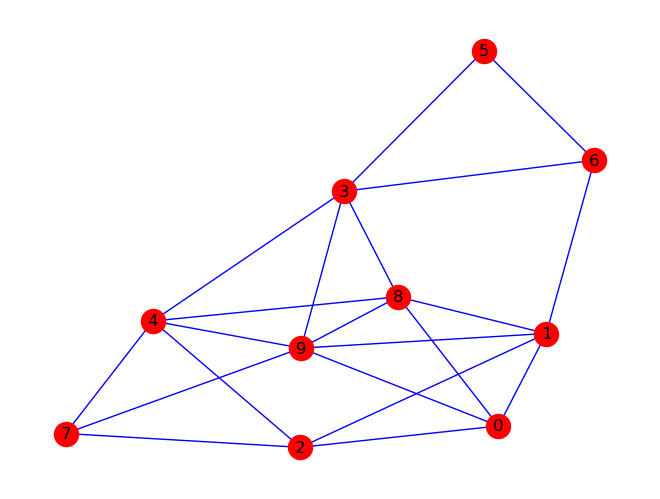

In [43]:
# default spring_layout
np.random.seed(42)
nx.draw(G, node_color='r', edge_color='b', labels={node: node for node in G.nodes()})

In [44]:
adj_matrix = nx.adjacency_matrix(G).todense()

In [45]:
adj_matrix

array([[0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 1, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 0, 1, 1, 0]], dtype=int32)

In [46]:
print(G)

Graph with 10 nodes and 21 edges


In [47]:
edge_list = list(G.edges)

In [48]:
edge_list

[(0, 1),
 (0, 2),
 (0, 8),
 (0, 9),
 (1, 8),
 (1, 9),
 (1, 2),
 (1, 6),
 (2, 4),
 (2, 7),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 8),
 (3, 9),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (7, 9),
 (8, 9)]

### Our Potential Allies

Since nodes 8 (Samsung) and 9 (American Express) have similar financial ties, there is potential for an alliance there. We can focus on these two companies by examining their **egocentric graphs**. By doing so, we will be looking at the ties and neighbors of those specific nodes. The graphs are smaller in size since they only focus on those connections. We can also see a pretty clear **clique**, or **cluster** being formed. A cluster is a tendency of nodes to be more connected with eachother than the rest of the network. 

In [49]:
# egocentric graph of node 8 - Samsung
np.random.seed(42)
samsung_graph = nx.ego_graph(G, 8)

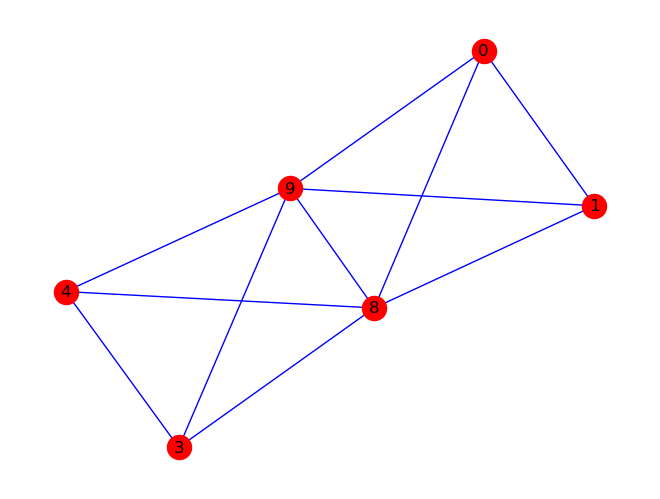

In [50]:
# egocentric graph of Samsung
nx.draw(samsung_graph, node_color='r', edge_color='b', labels={node: node for node in samsung_graph.nodes()})

In [51]:
# egocentric graph of node 9 - American Express
american_graph = nx.ego_graph(G, 9)

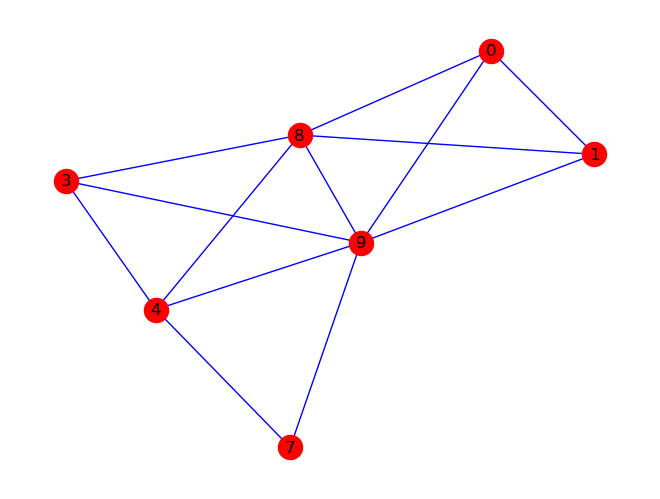

In [53]:
# egocentric graph of American Express
np.random.seed(42)
nx.draw(american_graph, node_color='r', edge_color='b', labels={node: node for node in american_graph.nodes()})

Although this network is very small with only 10 actors, the point is to illustrate phenomena that may occur in larger graphs. As we can see these graphs are very similar which coincides with our assumption that they are allies. The only difference that we see in this graph is that American Express has a direct tie to node 7 (Johnson & Johnson). This means these two companies have extremely similar ties which can be thought of as the old nursery ryhme, "your friends are my friends and my friends are your friends." 

#### Density

The density of a network, or in this case an egocentric network, tells us how well the nodes are connected to each other. This is calculated by dividing the number of edges by the number of total possible edges. This value ranges between 0 and 1. A complete graph where each node is connected to every other node will have a density of 1. In the egocentric graphs above we see that the density of the Samsung graph will be slightly higher than the density of the American Express graph since the American Express graph is adding one extra node that only has two edges. The density of both geocentric networks are fairly high and this could tell us that information within both of these networks travels efficiently since they have high density. In a low density network the information will have to be passed from one node to another but with these nodes being connected to eachother the information travels well. For example, in the American Express egocentric graph, we can say that node 7 can pass information to node 9 and node 4. Both of these nodes are well connected with the rest of the graph so information will be passed quickly and efficiently.

In [244]:
# samsung density
nx.density(samsung_graph)

0.7333333333333333

In [245]:
# american express density
nx.density(american_graph)

0.6190476190476191

#### Degree of a Node

When we discussed the density of the geocentric graphs we were looking at the edges for each node. The number of edges a node has is called the **degree** of a node. In a directed graph, a node has in-degree and out-degree which is calculated by the number of edges coming in and going out respectively. Since we are dealing with financial ties we can say that the connections are mutual so we just have degree as a whole. A node with a higher degree has more connections which can tell us how important they are in a network.

In [55]:
# degree of graph G
gdeg = nx.degree(G)

In [56]:
# degree for each node
gdeg

DegreeView({0: 4, 1: 5, 2: 4, 3: 5, 4: 5, 5: 2, 6: 3, 7: 3, 8: 5, 9: 6})

In [66]:
# degree for each node - node 9 (American Express) has the highest degree
for node, degree in gdeg:
    print(f'Node: {node} - Degree: {degree}')

Node: 0 - Degree: 4
Node: 1 - Degree: 5
Node: 2 - Degree: 4
Node: 3 - Degree: 5
Node: 4 - Degree: 5
Node: 5 - Degree: 2
Node: 6 - Degree: 3
Node: 7 - Degree: 3
Node: 8 - Degree: 5
Node: 9 - Degree: 6


We can visualize our graph in a different way that represents the nodes with a higher degree depicted as larger circles. For our small network we do not gain too much information since many of the nodes have the same degree but we can still see that node 9 is the largest and node 5 is the smallest. As a reminder, node 5 is AAA.

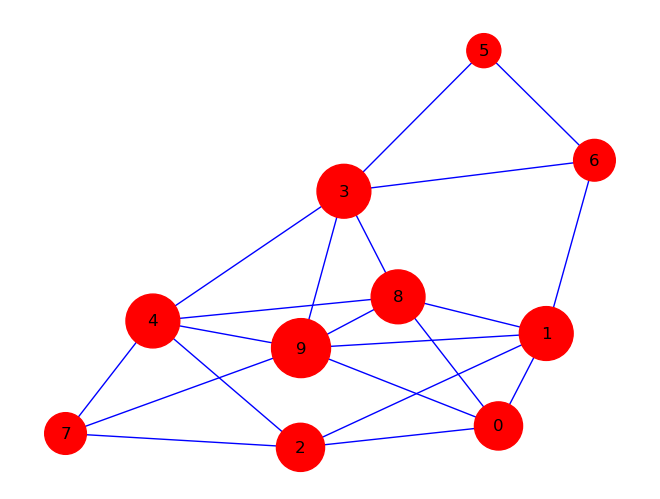

In [89]:
# default spring_layout
np.random.seed(42)
nx.draw(G, node_color='r', edge_color='b', 
        node_size = [300*value for (node, value) in gdeg],
                     labels={node: node for node in G.nodes()})

#### Centrality

Our next measure will be centrality. Degree centality tells us how important a node is in the network. When thinking intuitively about a network we can say that important nodes will have more connections. For example, in our network we think American Express will be an important node due to the ties it has with other companies across many industries. With that being said, we would assume that AAA is not an extremely important player in this network with the other companies involved. Degree centrality will give us a quantitative measure for this importance. The degree centrality is calculated by dividing the degree of a node by the total number of nodes in the network.

The two actors that we have chosen to examine are Samsung and American Express. Now we can calculate their degree centrality. We see that American Express has a higher degree centrality which is not surprising to us since we saw in the egocentric graph that they were extremely similar but American Express had one more connection than Samsung had. 

In [256]:
# samsung degree centrality - node 8 
deg_cent = nx.degree_centrality(G)

In [257]:
# degree centrality of Samsung
deg_cent[8]

0.5555555555555556

In [259]:
# Degree centrality of American Express
deg_cent[9]

0.6666666666666666

#### Betweenness Centrality

Another important measure of a network is **betweenness centrality**. This can tell us the influence of a node by finding the bridges of a network. If there are multiple components of a network these nodes will be the bridge that connects them. If we are to look at our network graph we would assume that nodes 3 and 6 are the bridges of our network. We say this since they connect node 5 to the rest of the network. We would also think that node 3 has a higher betweenness centrality than node 6 since node 3 has more connections to the rest of the graph. 

To find the betweenness centrality we must understand the meaning of a **path**. In a social network a path is a connection between two nodes where no edge or node is repeated. For betweenness centrality we will be using the shortest path between nodes. For example, the shortest path from node 1 to node 5 is to go through node 6. This means node 6 is important in the flow of information between the two nodes. Another example is the flow of information from node 8 to node 5. The shortest path would be to go from node 8 to node 3 to node 5. The shortest path from node 9 to 5 takes the same path. We see here that node 3 is the bridge between both of these nodes so there is importance in how the information is passed. From these examples it appears that node 3 will have the highest betweenness centrality.

Now that we understand betweenness centrality we can calculate it for our two actors, Samsung and American Express. We see from the calulations that the betweenness centrality of American Express is higher than Samsung. This is fairly easy to observe and understand since both nodes share the same exact connections except node 9, American Express, is connected to node 7, Johnson & Johnson, while Samsung is not. This means they are the bridge that connects the same other connections they share except American Express is a bridge for Johnson & Johnson while Samsung is not. 

As of now, American Express had a higher degree centrality and higher betweenness centrality than Samsung but remember Samsung had a higher density in its egocentric graph. All of these measures tell us different underlying mechanisms of the network and the importance of each measure depends on the situation we are in. 

In [70]:
# variable that holds all betweenness centrality measures
betweenness_cent = nx.betweenness_centrality(G)

In [75]:
# view betweenness centrality
betweenness_cent

{0: 0.0162037037037037,
 1: 0.13657407407407407,
 2: 0.053240740740740734,
 3: 0.21296296296296294,
 4: 0.10648148148148148,
 5: 0.0,
 6: 0.060185185185185175,
 7: 0.006944444444444444,
 8: 0.050925925925925916,
 9: 0.13425925925925924}

In [72]:
# Samsung
betweenness_cent[8]

0.050925925925925916

In [73]:
# American Express
betweenness_cent[9]

0.13425925925925924

Now we can graph the network with the node size being proportional to the betweenness centrality of our nodes. Since the betweenness centrality are such small numbers, we multiply their value by 10,000 to illustrate the importance. We see that node 3 is the largest node just as we expected. Node 5 has the smallest since it is not on the shortest path to any node. As mentioned earlier, node 9 is larger than node 8 since it is on the shortest path to node 7 while 8 is not, and they belong to the same number of shortest paths to other nodes. In terms of financial ties, this means we would like to have a financial tie with American Express over Samsung if we want to reach more companies. 

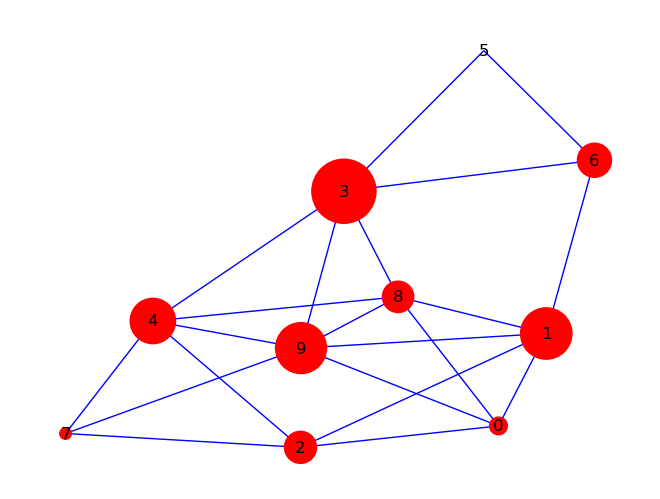

In [94]:
# graph of our network with node size proportional to betweenness centrality
np.random.seed(42)
nx.draw(G, node_color = 'r', edge_color = 'b', 
        node_size = [10000*value for (node, value) in betweenness_cent.items()],
        labels = {node: node for node in G.nodes()})

In [84]:
# unpacking the betweenness of nodes
for value, node in betweenness_cent.items():
    print(value, node)

0 0.0162037037037037
1 0.13657407407407407
2 0.053240740740740734
3 0.21296296296296294
4 0.10648148148148148
5 0.0
6 0.060185185185185175
7 0.006944444444444444
8 0.050925925925925916
9 0.13425925925925924


#### Closeness Centrality

The closeness centrality will tell us how close our node is to all other nodes in the network. It is the average length of the shortest path between the node and all other nodes. This measure will tell us which nodes will broadcast the information best. Since we only have a small and well connected graph the measures are similar for most nodes. 

In [96]:
# closeness centrality for all nodes
closeness_cent = nx.closeness_centrality(G)

As expected, many of our values are the same in this small network but in a big network this can tell us which nodes are closest to other nodes. These nodes are good candidates to spread information. We will continue our analysis of nodes 8 and 9 by examining their closeness centrality. We see by unpacking the dictionary closeness_cent that node 9 has a higher closeness centrality than node 8. This brings us back to our other measures where the similarity of both nodes, or perhaps the one difference between the nodes, makes this easy to understand. Since these nodes share all connections besides node 9 having a connection to node 7, their shortest paths are the same for all nodes besides node 7. To put it another way, each path from node 8 or 9 to any other node besides node 7 will be the same number.  

Since many of these values are very similar there is no reason to visualize it in terms of closeness centrality. We can simply look at the results.

In [97]:
# unpacking the closeness of nodes
for value, node in closeness_cent.items():
    print(value, node)

0 0.6
1 0.6923076923076923
2 0.6
3 0.6923076923076923
4 0.6923076923076923
5 0.47368421052631576
6 0.5625
7 0.5294117647058824
8 0.6923076923076923
9 0.75


#### Interpretation of Findings

Throughout the project we introduced the idea of a social network graph along with various metrics used to analyze the mechanisms within the graph. We focused on two nodes which were Samsung (8), and American Express (9). We saw that these two companies may have formed an aliance since they have very similar financial ties. The only difference in their financial ties is that American Express has a tie to Johnson & Johnson while Samsung does not. 

In terms of the density of both nodes, the egocentric graph of Samsung was more dense since it had one less node than the egocentric graph of American Express. Also, the extra node in American Express was not as closely tied as all other companies in the egocentric network. In terms of financial ties, if we are a company that is not tied to them directly, such as AAA, we may consider a connection with Samsung more beneficial to a connection with American Express if we are just concerned with effective transportation of information. However, since American Express and Samsung shared the same ties besides Johnson & Johnson, American Express had more connections, and a higher betweenness and closeness centrality score. Since both networks are dense but American Express has the extra connection, AAA may want to secure a connection with American Express to reach more companies. 

We can also look at the financial ties of both Samsung and American Express and wonder if they are paying too much money to have such similar ties. If the networking cost is high to hold these financial ties, they should try to diversify their ties. Since Samsung has no direct tie with Johnson & Johnson, the can connect with them through American Express whom they share a tie with. But, since they both share so many ties they are not gaining much by having a tie with eachother. 

We can also see that AAA only has two ties and both of these ties are not very important players in the network besides their betweenness centrality. Although their ties connect them to the rest of the network, the companies they are tied to do not have many connects so the information may travel slowly throughout the network. 

The financial ties in this example can be thought of as interlocking boards in the companies. According to Salgado et al. (2023), the ties between companies and interlocking boards can be tied to various coorporate measures such as performance and compensation. Although the ties are fabricated it can be a useful example. Let's say Samsung has an HR process that is very efficient and smooth while Johnson & Johnson are spending too much time and money on trying to correct their practices. If they have a tie to Samsung, they can streamline the HR processes that are working so well to minimize cost and labor in that field. We would also expect interlocking boards at Samsung and American Express because they share such common ties. The boards of both companies appear to want financial ties with similar companies. We can see how important it is to be a major player in this network when compensation and performance can also be tied. If a company has many ties the salaries of individuals can be established across many other companies leading to competitive wages. These ties can set the markey price for individuals. 
 

#### References

Salgado, C. P., Adami, V. S., De Souza Verschoore, J. R., & Costa, C. M. (2023). Board of Directors’ Interlocks: A social network analysis tutorial. https://www.redalyc.org/journal/840/84073372007/html/